 # K-Means 

**K-Means Clustering** is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

The real world applications of K-Means include:
### -  customer profiling
### -  market segmentation
### -  computer vision
### -  search engines
### -  astronomy

# How it works? 

i) We randomly initialize the K starting centroids. Each data point is assigned to its nearest centroid.<br>
ii) The centroids are recomputed as the mean of the data points assigned to the respective cluster.<br>
iii) Repeat steps 1 and 2 until we trigger our stopping criteria.<br>
we use 
###  Euclidean distance
### Squared Euclidean distance
### Mahalanobis distance.......etc.


**Simply**, K means can be thought of as grouping the data into K clusters where assignment to the clusters is based on some similarity or distance measure to a centroid to the data point.
 <img src="kmeans.gif" alt="kmeans" title="Kmeans" />

### **Steps**
1. Select K (i.e. 3) random points as cluster centers called centroids
2. Assign each data point to the closest cluster by calculating its distance with respect to each centroid.
3. Determine the new cluster center by computing the average of the assigned points.
4. Repeat steps 2 and 3 until none of the cluster assignments change

### Choosing the right number of clusters
Often times the data will have multiple dimensions making it difficult to visual. As a result, the optimum number of clusters is no longer observable.A way of determining this mathematically.
We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off simply called **elbow method**, and the graph is called **elbow graph.**

### Elbow method
<img src="elbow.png" title="Elbow Graph" />

WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

$$WCSS=\sum_{i=0}^m (x_i-c_i)^2$$

#### Example
 <img src="ex.png" title="Elbow Graph" />

# Code


We are using **KMeans Clustering** to cluster Universities into to two groups, Private and Public.

## The Data

A data frame with 777 observations on the following 18 variables.

<font color= Blue>
1. Private A factor with levels No and Yes indicating private or public university

2. Apps Number of applications received

3.  Accept Number of applications accepted

4.  Enroll Number of new students enrolled

5. Top10perc Pct. new students from top 10% of H.S. class

6. Top25perc Pct. new students from top 25% of H.S. class

7.  F.Undergrad Number of fulltime undergraduates

8. P.Undergrad Number of parttime undergraduates

9. Outstate Out-of-state tuition

10. Room.Board Room and board costs

11. Books Estimated book costs

12. Personal Estimated personal spending

13. PhD Pct. of faculty with Ph.D.’s

14. Terminal Pct. of faculty with terminal degree

15. S.F.Ratio Student/faculty ratio

16. perc.alumni Pct. alumni who donate

17. Expend Instructional expenditure per student

18. Grad.Rate Graduation rate
</font>

**Source**
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The dataset was used in the ASA Statistical Graphics Section’s 1995 Data Analysis Exposition.

## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df = pd.read_csv('College_Data.csv')

**Check the head of the data**

In [3]:
df.head(3)

,NameofInstitution,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
NameofInstitution    777 non-null object
Private              777 non-null object
Apps                 777 non-null int64
Accept               777 non-null int64
Enroll               777 non-null int64
Top10perc            777 non-null int64
Top25perc            777 non-null int64
F.Undergrad          777 non-null int64
P.Undergrad          777 non-null int64
Outstate             777 non-null int64
Room.Board           777 non-null int64
Books                777 non-null int64
Personal             777 non-null int64
PhD                  777 non-null int64
Terminal             777 non-null int64
S.F.Ratio            777 non-null float64
perc.alumni          777 non-null int64
Expend               777 non-null int64
Grad.Rate            777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB


In [5]:
df.isnull().sum()

NameofInstitution    0
Private              0
Apps                 0
Accept               0
Enroll               0
Top10perc            0
Top25perc            0
F.Undergrad          0
P.Undergrad          0
Outstate             0
Room.Board           0
Books                0
Personal             0
PhD                  0
Terminal             0
S.F.Ratio            0
perc.alumni          0
Expend               0
Grad.Rate            0
dtype: int64

We can see there are no missing values

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA


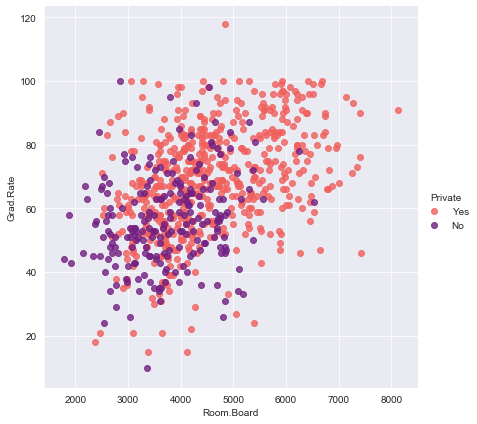

In [7]:
sns.set_style('darkgrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',palette='magma_r',size=6,aspect=1,fit_reg=False)

**scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

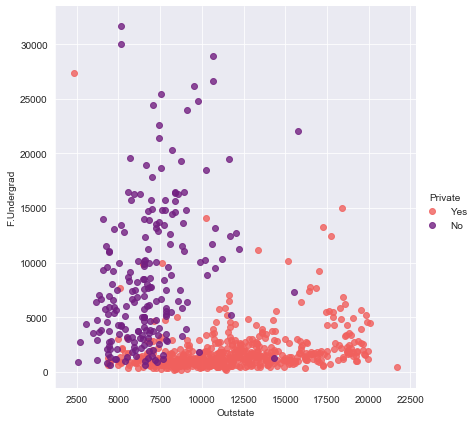

In [8]:
sns.set_style('darkgrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',palette='magma_r',size=6,aspect=1,fit_reg=False)

**scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

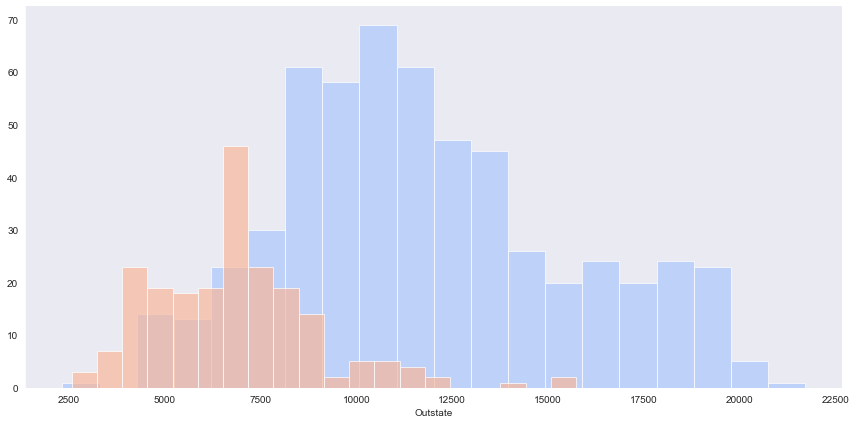

In [9]:
sns.set_style('dark')
h = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
h = h.map(plt.hist,'Outstate',bins=20,alpha=0.7)

**A stacked histogram showing Out of State Tuition based on the Private column.**

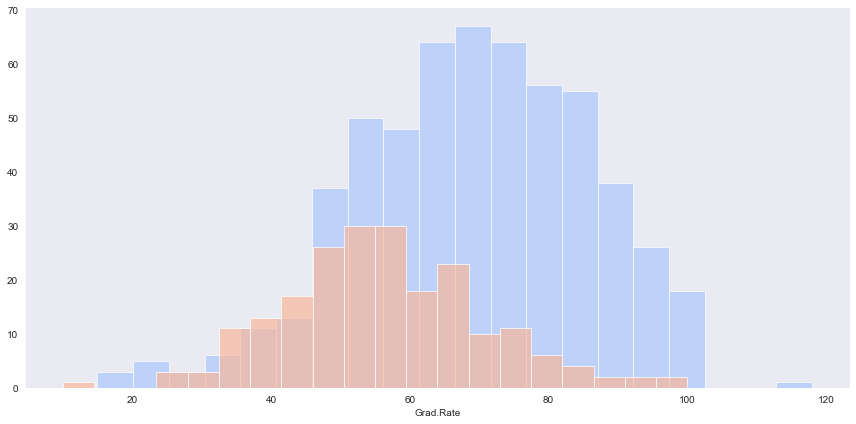

In [10]:
sns.set_style('dark')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

**A histogram for the Grad.Rate column.**

**We can see there seems to be a private school with a graduation rate of higher than 100%.**

In [11]:

df[df['Grad.Rate'] > 100]

,NameofInstitution,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**we need to set that school's graduation rate to 100 so it makes sense. we get a warning not an (error) , so we use dataframe operations and check the  histogram visualization to make sure it actually changed.**

In [12]:
df.set_value(95, 'Grad.Rate', 100)


,NameofInstitution,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [13]:
df[df['Grad.Rate'] > 100]

,NameofInstitution,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


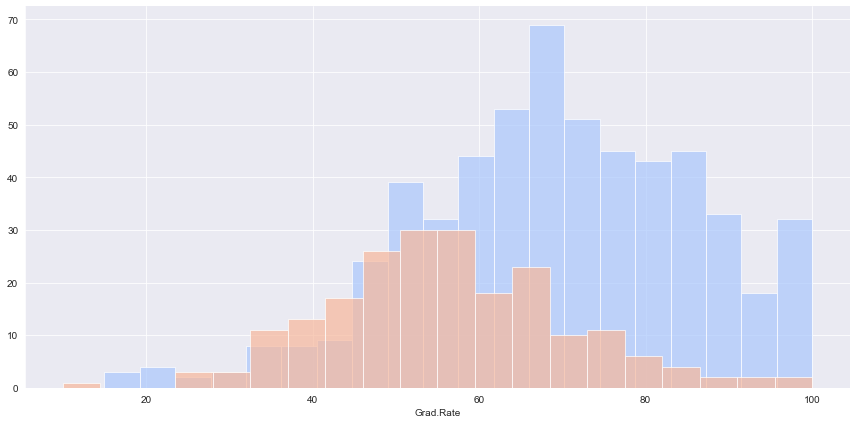

In [14]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

Before Running Kmeans algorithm we need to drop the character data i.e, name ofinstitution

In [15]:
df=df.drop(['NameofInstitution',],axis=1)

## Selecting K Means Cluster 

**Import KMeans from SciKit Learn.**

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [18]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**The cluster center vectors for unlabeled data**

In [19]:
means=kmeans.cluster_centers_
print(means)

[[1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]
 [1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]]


## Evaluation

There is no perfect way to evaluate clustering if we don't have the labels, however, we do have the labels, so we take advantage of this to evaluate our clusters.

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [20]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [21]:
df['Cluster'] = df['Private'].apply(converter)

In [22]:
df.head(1)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1


In [23]:
df.Private.value_counts()


Yes    565
No     212
Name: Private, dtype: int64

**Creating a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



We can see there is 78% accuracy of grouping the data


In [25]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**The cluster center vectors for labeled data**

In [31]:
means1=kmeans.cluster_centers_
print(means1)

[[1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01 3.14814815e-01]
 [1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01 7.93721973e-01]]


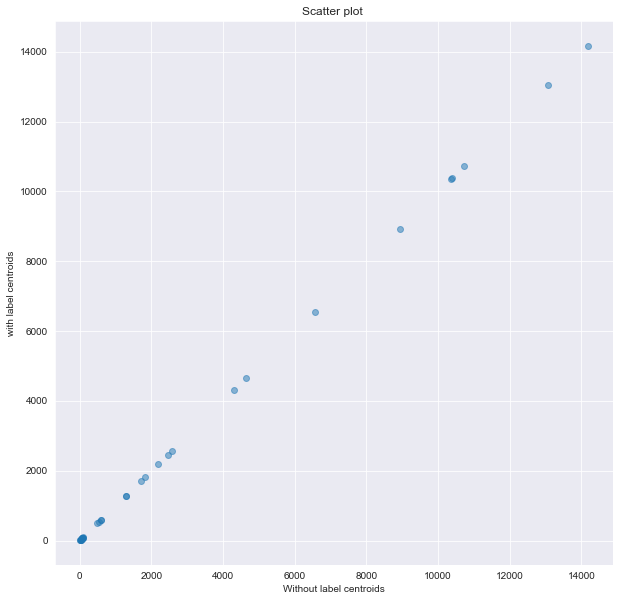

In [38]:
fig = plt.figure(figsize=(10,10))
plt.scatter(means,means1, alpha=0.5)
plt.title('Scatter plot ')
plt.xlabel('Without label centroids')
plt.ylabel('with label centroids')
plt.show()

Text(0.5, 0, 'with Label')

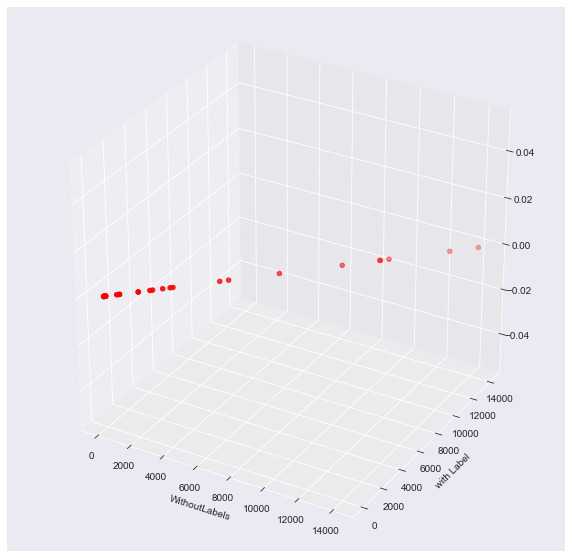

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x =means
y =means1



ax.scatter(x, y, c='r', marker='o')

ax.set_xlabel('WithoutLabels')
ax.set_ylabel('with Label')

**The algorithm is purely using the features to cluster the universities into 2 distinct Clusters. KMeans is useful for clustering un-labeled data.**

# WCSS

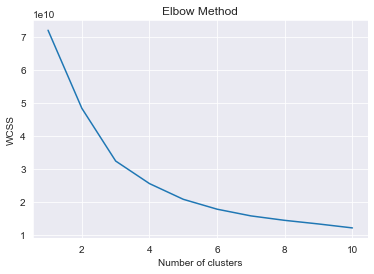

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.drop('Private',axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=4)

In [43]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
kmeans.cluster_centers_

array([[2.32830097e+03, 1.58846602e+03, 4.92830097e+02, 3.74417476e+01,
        6.68640777e+01, 1.96334951e+03, 3.04563107e+02, 1.50857718e+04,
        5.18160194e+03, 5.68315534e+02, 1.07616505e+03, 8.20582524e+01,
        8.90000000e+01, 1.17500000e+01, 3.14660194e+01, 1.28801165e+04,
        7.57038835e+01, 9.90291262e-01],
       [1.67909382e+03, 1.20654158e+03, 5.02245203e+02, 2.03454158e+01,
        4.80191898e+01, 2.32546055e+03, 7.21164179e+02, 8.45028145e+03,
        3.95973987e+03, 5.31840085e+02, 1.36672921e+03, 6.56183369e+01,
        7.31321962e+01, 1.50407249e+01, 1.95628998e+01, 7.30658422e+03,
        6.07249467e+01, 7.12153518e-01],
       [1.07111341e+04, 7.35846341e+03, 2.95760976e+03, 3.21585366e+01,
        6.37195122e+01, 1.55374756e+04, 3.11045122e+03, 8.28236585e+03,
        4.15140244e+03, 5.95500000e+02, 1.87660976e+03, 8.42926829e+01,
        8.97560976e+01, 1.63512195e+01, 1.59512195e+01, 9.49881707e+03,
        6.08902439e+01, 8.53658537e-02],
       [9.341

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[  2 135  75   0]
 [204 334   7  20]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       212
           1       0.71      0.59      0.65       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.43       777
   macro avg       0.18      0.15      0.16       777
weighted avg       0.52      0.43      0.47       777



As we can see as we increase the clusters the accuracy of the algorithm decreases 

In [46]:
kmeans = KMeans(n_clusters=6)

In [47]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
kmeans.cluster_centers_

array([[1.35493091e+03, 1.04448364e+03, 3.61025455e+02, 2.51090909e+01,
        5.34000000e+01, 1.48434182e+03, 4.56254545e+02, 1.15509455e+04,
        4.63094909e+03, 5.37945455e+02, 1.19984364e+03, 6.93418182e+01,
        7.76181818e+01, 1.30683636e+01, 2.55600000e+01, 9.12509091e+03,
        6.92363636e+01, 9.81818182e-01],
       [9.17100000e+03, 3.62557895e+03, 1.31457895e+03, 7.54736842e+01,
        9.15263158e+01, 5.26426316e+03, 4.31315789e+02, 1.80456316e+04,
        6.04889474e+03, 5.69052632e+02, 1.26373684e+03, 9.30000000e+01,
        9.66315789e+01, 6.56315789e+00, 3.51578947e+01, 3.29746316e+04,
        8.85263158e+01, 1.00000000e+00],
       [2.93307826e+03, 1.84125217e+03, 5.57417391e+02, 4.45913043e+01,
        7.37304348e+01, 2.18336522e+03, 2.26573913e+02, 1.66457565e+04,
        5.35880870e+03, 5.73834783e+02, 1.00786087e+03, 8.60434783e+01,
        9.24347826e+01, 1.09252174e+01, 3.44608696e+01, 1.49999652e+04,
        7.88695652e+01, 9.91304348e-01],
       [6.398

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[  5   0   1  96  26  84]
 [270  19 114   9   4 149]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       212
           1       1.00      0.03      0.07       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.03       777
   macro avg       0.17      0.01      0.01       777
weighted avg       0.73      0.03      0.05       777



## As we can see as we increase the clusters the accuracy of the algorithm decreases 